In [2]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 10000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9

In [6]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):
    
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()  
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done: 
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")

# and now we can see our Q values!

[[1.59022013e-01 1.11635856e-02 8.88363244e-03 1.11689334e-02]
 [5.71262434e-03 6.16754394e-03 1.44756816e-03 1.66259339e-01]
 [5.44621197e-03 6.21011089e-03 3.81378534e-03 1.94555171e-01]
 [4.04539093e-03 2.01526269e-03 2.70803806e-03 1.41566151e-01]
 [2.19224687e-01 5.38146015e-03 3.09254163e-03 4.64329506e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.19235193e-01 1.64425958e-07 1.96300448e-07 7.88963311e-08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.71942627e-03 1.51196964e-03 1.50371962e-03 1.80996635e-01]
 [2.78699114e-03 1.83177918e-01 1.20262731e-03 1.69999390e-03]
 [2.57441841e-01 2.36146318e-04 2.23850193e-04 1.30331084e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.53850506e-02 4.77597324e-03 2.56078310e-01 3.12145967e-02]
 [9.73035692e-02 8.60522332e-01 7.91417771e-02 4.34745281e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

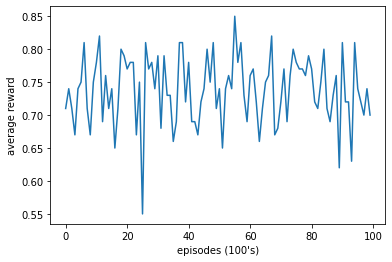

In [8]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()